In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading a CSV file

In [2]:
data=pd.read_csv("Advertising.csv")

In [ ]:
# Displaying the first 5 rows of the data

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data["total_ads"]=data["TV"]+data["radio"]+data["newspaper"]

In [5]:
data.head()

,TV,radio,newspaper,sales,total_ads
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [ ]:
# Preparing the X and y data columns

In [6]:
X = data.drop(["sales","total_ads"],axis=1)
y = data["sales"]

In [7]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [8]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
# Scatter plot

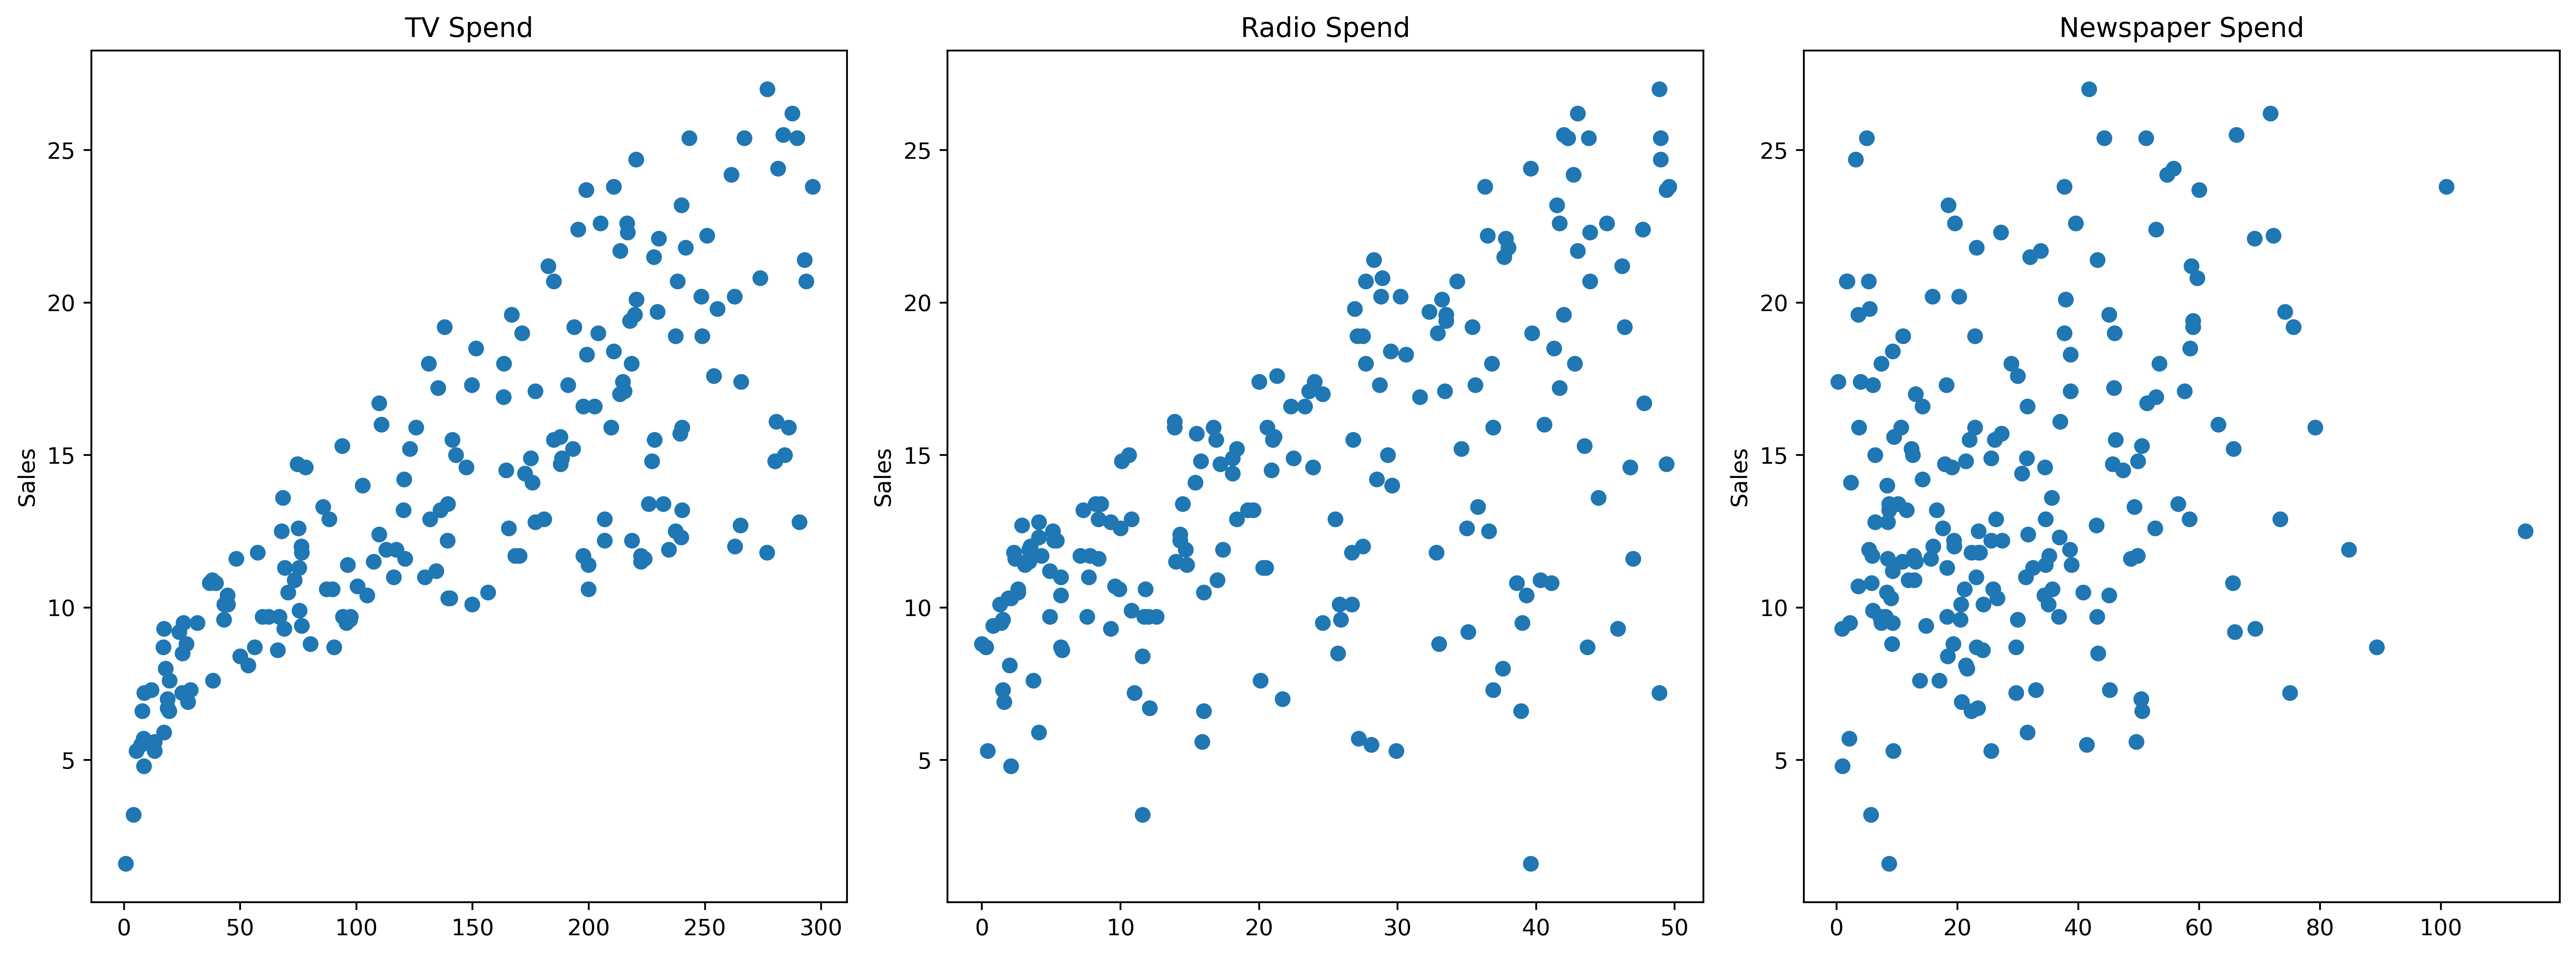

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=500)
axes[0].plot(data["TV"],data["sales"],"o")
axes[0].set_title("TV Spend")
axes[0].set_ylabel("Sales")

axes[1].plot(data["radio"],data["sales"],"o")
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(data["newspaper"],data["sales"],"o")
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout();

In [ ]:
# Spliting into train and test data

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
# Importing the Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model = LinearRegression()

In [ ]:
# Fitting the model 

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predicting through the model 

In [15]:
y_pred=model.predict(X_test)

In [ ]:
# Performance Evaluation - MAE, MSE, RMSE

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
mean_absolute_error(y_test,y_pred)

1.2137457736144808

In [18]:
mean_squared_error(y_test,y_pred)

2.2987166978863782

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.516151937599388

In [ ]:
# Plotting the regression line over scatter plot

<AxesSubplot:xlabel='total_ads', ylabel='sales'>

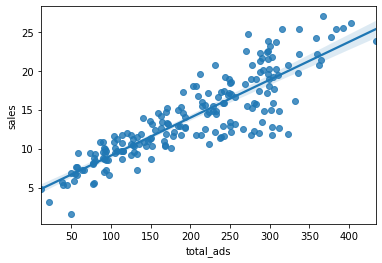

In [20]:
import seaborn as sns
sns.regplot(data=data,x="total_ads",y="sales")

In [ ]:
# Residual Plot

In [23]:
residue_y = y_test - y_pred

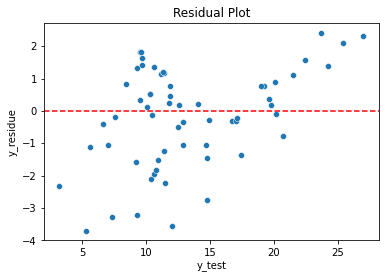

In [31]:
sns.scatterplot(x=y_test,y=residue_y)
plt.axhline(y=0,color="red",ls="--")
plt.ylabel("y_residue")
plt.xlabel("y_test")
plt.title("Residual Plot")
plt.show()

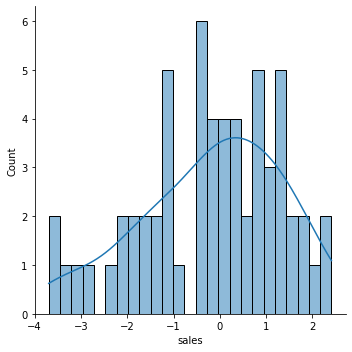

In [34]:
sns.displot(residue_y,kde=True,bins=25)

In [36]:
final_model=LinearRegression()

In [37]:
final_model.fit(X,y)

LinearRegression()

In [46]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
y_hat=final_model.predict(X)

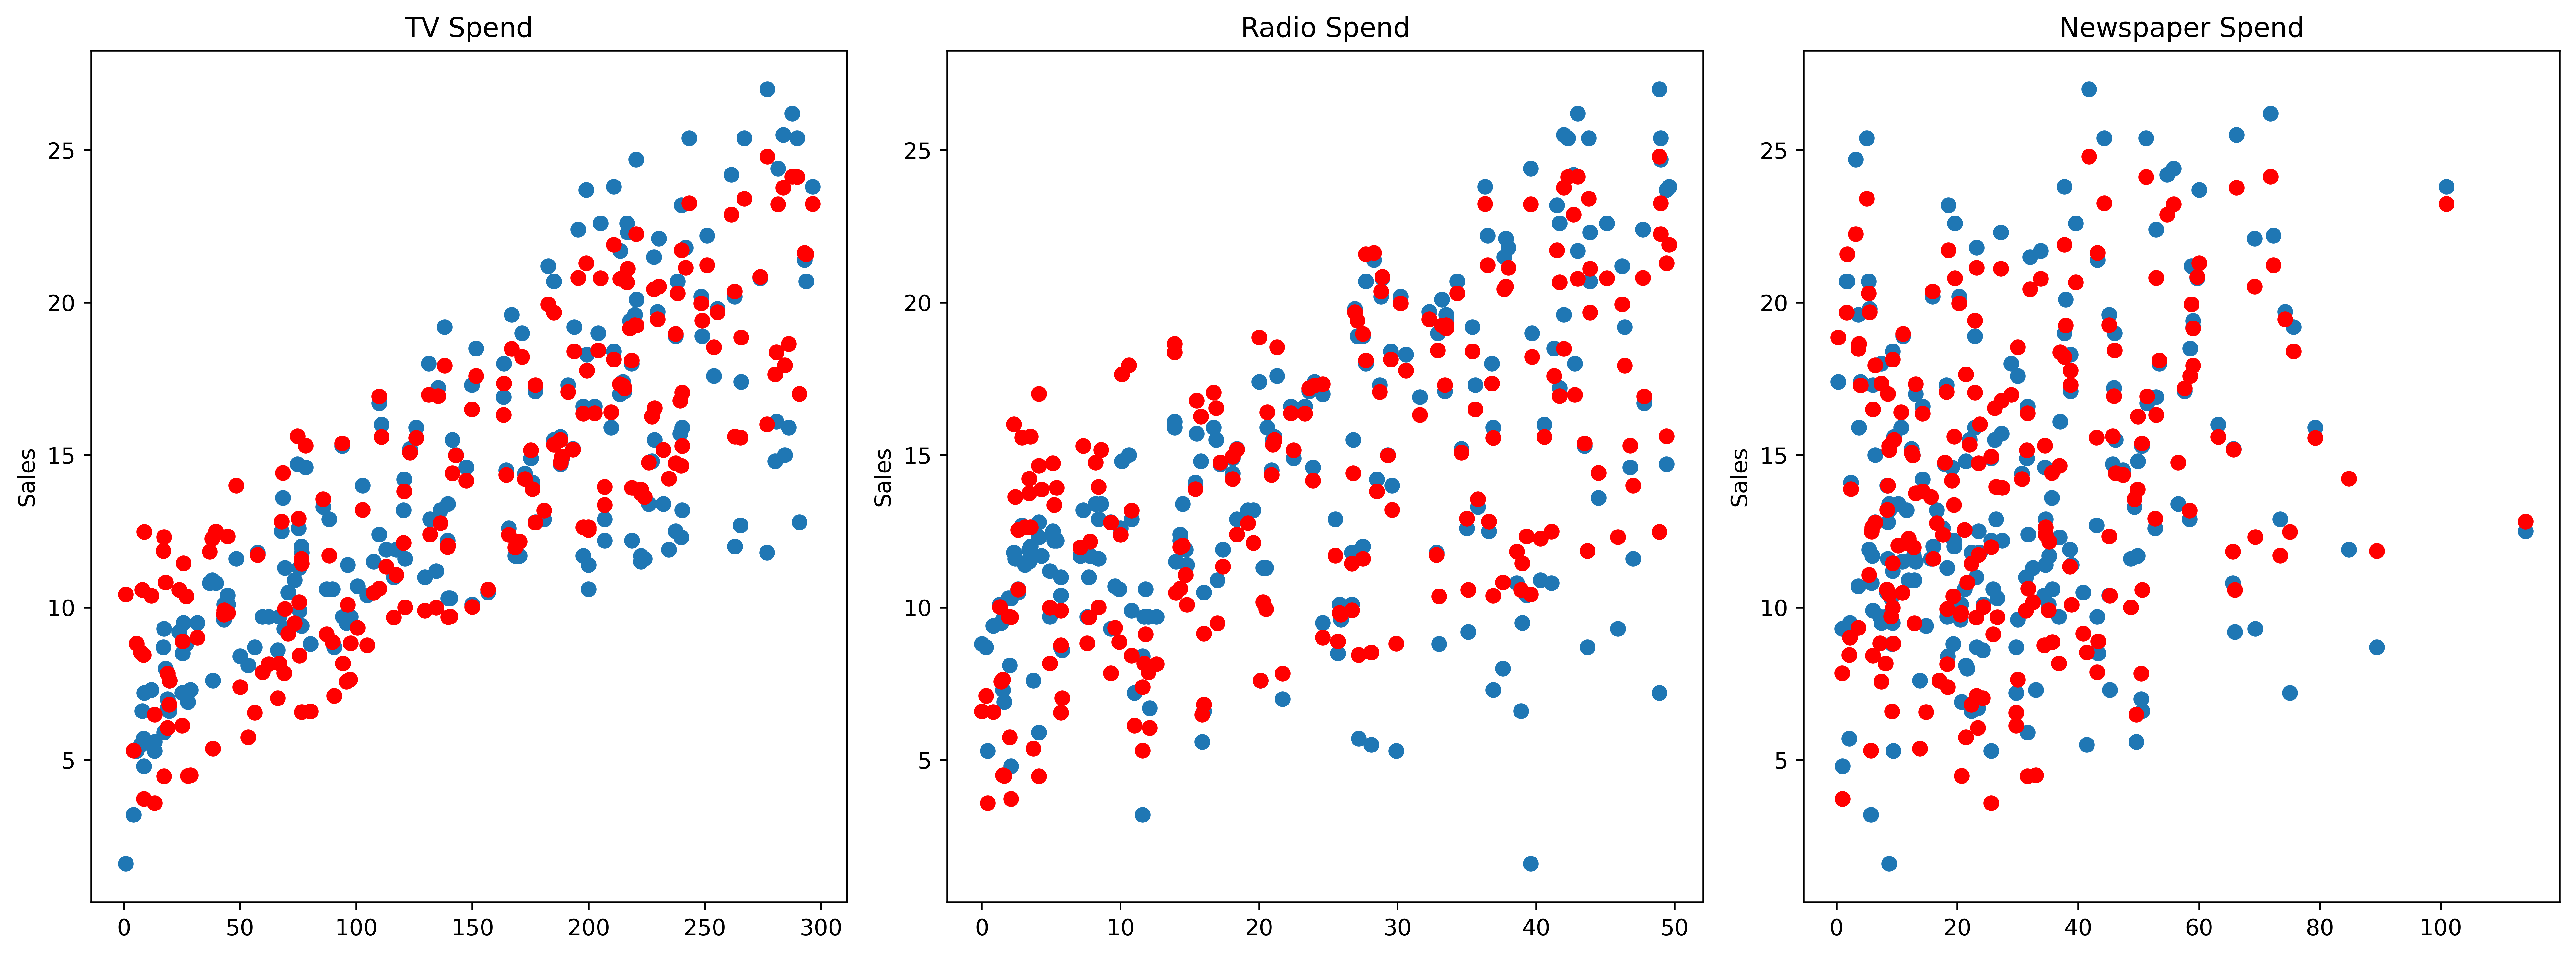

In [45]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6),dpi=500)
axes[0].plot(data["TV"],data["sales"],"o")
axes[0].plot(data["TV"],y_hat,"o",color="red")
axes[0].set_title("TV Spend")
axes[0].set_ylabel("Sales")

axes[1].plot(data["radio"],data["sales"],"o")
axes[1].plot(data["radio"],y_hat,"o",color="red")
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(data["newspaper"],data["sales"],"o")
axes[2].plot(data["newspaper"],y_hat,"o",color="red")
axes[2].set_title("Newspaper Spend")
axes[2].set_ylabel("Sales")

plt.tight_layout();

In [ ]:
# Deployment

In [47]:
from joblib import dump,load

In [48]:
dump(final_model,"final_sales_model.joblib")

['final_sales_model.joblib']

In [50]:
loaded_model=load("final_sales_model.joblib")

In [51]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.shape

(200, 3)

In [55]:
#149 TV, 22 Radio, 12 Newspaper
#Sales=??

campaign = [[149,22,12]]
loaded_model.predict(campaign)

array([13.893032])